## Pull down USGS data

In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from utils.constants import *

def get_endmember_data(cur_endmember):
    ENDMEMBER_PATH = USGS_DATA +  cur_endmember + "/"
    df = pd.read_csv(ENDMEMBER_PATH + "reflectance.txt", delimiter = "\t", names=['reflectance'],skiprows=1)
    df_W = pd.read_csv(ENDMEMBER_PATH + "wavelengths.txt", delimiter = "\t", names=['wavelength'],skiprows=1)
    wavelengths = df_W['wavelength'].values
    mags = df['reflectance'].values
    
    # replace each missing index with next non-missing index. 
    missing_indices = np.where(mags  < 0)[0]
    if len(missing_indices) > 0:
        print("Replacing " + str(len(missing_indices))+ "  missing/NULL mags with next available value to fill-in.")
        print(missing_indices)
    for missing_index in missing_indices:
        next_index = missing_index+1
        while next_index is not None: 
            if next_index >= len(mags):
                mags[missing_index] = 0
                break
            if mags[next_index] > 0:
                mags[missing_index] = mags[next_index]
                next_index = None
                break
            else:
                next_index = next_index + 1

    return wavelengths, mags

In [18]:
with open(R_DIR + "../wavelengths.pickle", 'rb') as handle:
    wavelengths = pickle.load(handle)
    
with open(R_DIR + "olivineFo51_reflectance.pickle", 'rb') as handle:
    mags = pickle.load(handle)

    
# wavelengths, mags=get_endmember_data("olivineFo51")

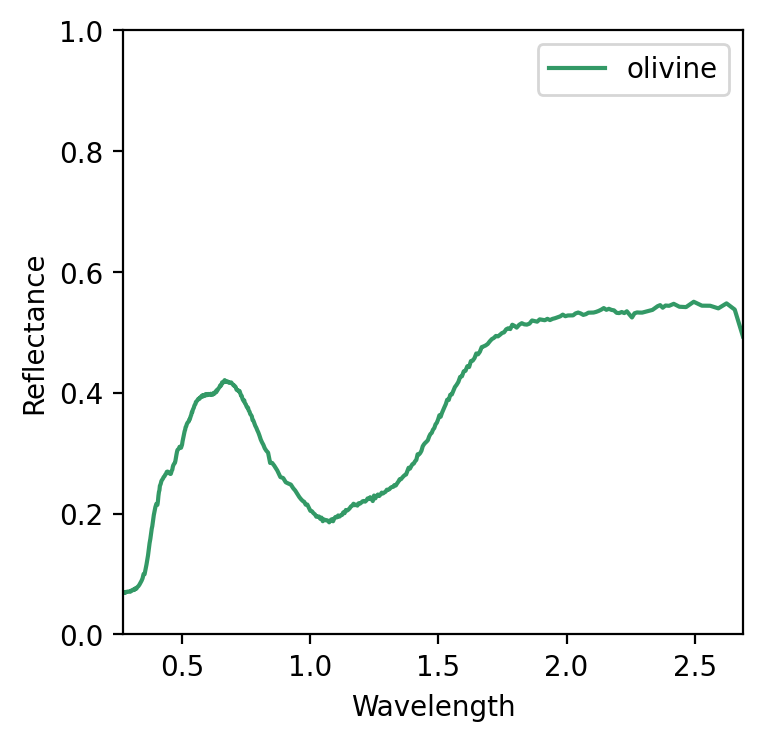

In [19]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=200) 
ax.plot(wavelengths, mags,
            color=DARK_GREEN,
            label='olivine')
ax.set_ylabel("Reflectance")
ax.set_xlabel("Wavelength")
ax.set_ylim((0, 1))
ax.set_xlim((min(wavelengths), max(wavelengths)))
plt.legend()
plt.show()

## Preprocess endmembers
Process endmembers. Remove values for which we are missing reflectances (first and last 9 values) from each endmember. Save wavelengths and reflectances as pickle

In [16]:
import pickle 
endmembers = ["diopside", "augite", "pigeonite", "hypersthene", 
              "enstatite", "andesine", "labradorite", "olivineFo51", "magnetite"]

for endmember in endmembers:
    W, M = get_endmember_data(endmember)
    # Save endmember data as pickle, clipping first 9 and last 9 reflectances.
    W=W[10:-9]
    M=M[10:-9] 
    with open(R_DIR  + endmember + "_reflectance.pickle", 'wb') as f:
        pickle.dump(M, f)

W, M = get_endmember_data("diopside")
W=W[10:-9]
with open(PREPROCESSED_DATA + "wavelengths.pickle", 'wb') as f:
    pickle.dump(W, f)
# WS=[]
# for i, v in enumerate(WS):
#     if i!=len(WS)-1:
#         if (WS[i] == WS[i+1]).all():
#             print(str(i) + " equals next")
# print("All wavelengths equal each other.")

Replacing 6  missing/NULL mags with next available value to fill-in.
[0 1 2 3 4 5]
Replacing 2  missing/NULL mags with next available value to fill-in.
[0 1]
Replacing 3  missing/NULL mags with next available value to fill-in.
[  0   1 239]
Replacing 3  missing/NULL mags with next available value to fill-in.
[0 1 2]
Replacing 5  missing/NULL mags with next available value to fill-in.
[0 1 2 3 4]
Replacing 8  missing/NULL mags with next available value to fill-in.
[  0   1   2   3   4   5   6 239]
Replacing 3  missing/NULL mags with next available value to fill-in.
[  0   1 239]
Replacing 21  missing/NULL mags with next available value to fill-in.
[  0   1   2   3   4   5   6   7   8   9  67 239 471 472 473 474 475 476
 477 478 479]
Replacing 7  missing/NULL mags with next available value to fill-in.
[0 1 2 3 4 5 6]
Replacing 6  missing/NULL mags with next available value to fill-in.
[0 1 2 3 4 5]


Find optical constants using estimatek.py

In [4]:
from utils.access_data import *
a=get_USGS_endmember_k('labradorite')

## Pull down all RELAB data

In [ ]:
from utils.access_data import *
from utils.constants import *

import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
file_name = CATALOGUE_PATH + "Minerals.xls"
minerals = pd.read_excel(file_name)

relab_db = get_data()

Find Sample ID for specific endmember


In [ ]:
target_endmember = "Augite"
t_df = relab_db[relab_db['Text'].str.contains(target_endmember) == True]

In [ ]:
specid='C4LS09'
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
cur_data= get_reflectance_data(spectrum_id='C1LU07', spectra_db=relab_db, CRISM_match=False)
ax.plot(cur_data['Wavelength(micron)'],
            cur_data['Reflectance'],
            color="blue",
            label=specid)


In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)
l = a['SpectrumID'].tolist()
colors = [LIGHT_GREEN, DARK_GREEN, LIGHT_BLUE, PINK, DARK_BLUE, RED, "black", "blue", "yellow"]
for index, specid in enumerate(l):
    print(specid)
    cur_data= get_reflectance_data(spectrum_id=specid, spectra_db=relab_db, CRISM_match=False)
    ax.plot(cur_data['Wavelength(micron)'],
            cur_data['Reflectance'],
            color=colors[index],
            label=specid)
ax.set_ylabel("Reflectance")
ax.set_xlabel("Wavelength")
ax.set_ylim((0, 0.7))
ax.set_xlim((min(cur_data['Wavelength(micron)']), 2))
plt.legend()
plt.show()
# fig.savefig(MODULE_DIR + "/output/figures/endmembers.pdf")

In [ ]:
USGS_data = get_USGS_data("olivine (Fo80)", CRISM_match=False)

In [ ]:
endmember = "olivine (Fo51)"
file_name = USGS_DATA + endmember + ".csv"
for r in ["(", ")", " "]:
    file_name = file_name.replace(r, "").lower()
data = pd.read_csv(file_name)

In [ ]:
data.loc[data['reflectance'] < 0, 'reflectance'] = 0

In [ ]:
for endmember in USGS_PURE_ENDMEMBERS:
    if endmember != 'basaltic glass':
        USGS_data = get_USGS_data(endmember, CRISM_match=False)
        if USGS_data['wavelength'].tolist() != oliv_fo80_wavelengths:


In [ ]:
from utils.plotting import *
plot_endmembers()

In [ ]:
from utils.plotting import *
plot_endmembers(CRISM_match=True)

#### Verify angles of RELAB data

From RELAB documentation here http://www.planetary.brown.edu/relabdata/catalogues/Catalogue_README.html

SourceAngle = Angle of illumination in degrees

DetectAngle = Angle of emergence or detection in degrees

In [ ]:
from utils.access_data import *
spectra_db = get_data()

In [ ]:
# SourceAngle
# DetectAngle 
OLIVINE_SID = "C1PO17" 

source_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['SourceAngle'].values[0]
phase_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['PhaseAngle'].values[0]
emission_angle = spectra_db[spectra_db['SpectrumID']  == OLIVINE_SID]['DetectAngle'].values[0]
print("Incidence angle: " + str(source_angle) + ", phase angle: " + str(phase_angle)
      + ", emission angle: " + str(emission_angle))